In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt

# regression imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# time-series imports
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller



In [2]:
Down_traffic = pd.read_parquet("./Data/Down_traffic.parq")
Up_traffic = pd.read_parquet("./Data/Up_traffic.parq")

In [3]:
Down_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9681 entries, 0 to 9680
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               9681 non-null   datetime64[ns]
 1   LocationLatitude        9681 non-null   float64       
 2   LocationLongitude       9681 non-null   float64       
 3   RadioOperatorName       9681 non-null   category      
 4   RadioNetworkGeneration  9681 non-null   category      
 5   RadioConnectionType     9681 non-null   category      
 6   RadioMobileDataEnabled  9681 non-null   category      
 7   DeviceManufacturer      9681 non-null   category      
 8   DeviceName              9681 non-null   category      
 9   TrafficDirection        9681 non-null   category      
 10  TrafficVolume           9681 non-null   float64       
 11  RSRP                    9681 non-null   float64       
dtypes: category(7), datetime64[ns](1), float64(4)
me

In [4]:
Down_traffic.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RadioNetworkGeneration,RadioConnectionType,RadioMobileDataEnabled,DeviceManufacturer,DeviceName,TrafficDirection,TrafficVolume,RSRP
0,2019-11-01 20:00:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Downlink,1.244167,-99.777778
1,2019-11-01 20:15:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Downlink,0.145414,-101.200000
2,2019-11-01 21:00:00,24.526780,46.666590,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A51,Downlink,0.027583,-89.888889
3,2019-11-01 21:00:00,24.549557,46.691914,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy J8,Downlink,164.994614,-69.000000
4,2019-11-01 21:00:00,24.560373,46.865420,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A70,Downlink,22.345335,-111.666667
5,2019-11-01 21:00:00,24.571188,46.637253,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy A20,Downlink,0.319108,-100.250000
6,2019-11-01 21:00:00,24.596653,46.680504,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy Note8,Downlink,75.150810,-83.000000
7,2019-11-01 21:00:00,24.597780,46.633713,Operator A,4G,Mobile,Enabled,HTC,Desire 12,Downlink,19.096824,-88.142857
8,2019-11-01 21:00:00,24.597988,46.723907,Operator A,4G,Mobile,Enabled,HUAWEI,Honor 10I,Downlink,0.030366,-82.000000
9,2019-11-01 21:00:00,24.598774,46.676735,Operator B,4G,Mobile,Enabled,HTC,M9,Downlink,50.598703,-97.400000


In [5]:
Up_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9613 entries, 0 to 9612
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               9613 non-null   datetime64[ns]
 1   LocationLatitude        9613 non-null   float64       
 2   LocationLongitude       9613 non-null   float64       
 3   RadioOperatorName       9613 non-null   category      
 4   RadioNetworkGeneration  9613 non-null   category      
 5   RadioConnectionType     9613 non-null   category      
 6   RadioMobileDataEnabled  9613 non-null   category      
 7   DeviceManufacturer      9613 non-null   category      
 8   DeviceName              9613 non-null   category      
 9   TrafficDirection        9613 non-null   category      
 10  TrafficVolume           9613 non-null   float64       
 11  RSRP                    9613 non-null   float64       
dtypes: category(7), datetime64[ns](1), float64(4)
me

In [6]:
Up_traffic.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioOperatorName,RadioNetworkGeneration,RadioConnectionType,RadioMobileDataEnabled,DeviceManufacturer,DeviceName,TrafficDirection,TrafficVolume,RSRP
0,2019-11-01 19:15:00,24.626139,46.689728,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,2.731466,-87.000000
1,2019-11-01 20:00:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,1.175476,-99.777778
2,2019-11-01 20:15:00,24.626087,46.689846,Operator C,4G,Mobile,Enabled,SAMSUNG,Galaxy Grand Prime Plus,Uplink,0.105763,-101.200000
3,2019-11-01 21:00:00,24.526780,46.666590,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A51,Uplink,0.027508,-89.888889
4,2019-11-01 21:00:00,24.549557,46.691914,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy J8,Uplink,9.920519,-69.000000
5,2019-11-01 21:00:00,24.558767,46.612730,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A50,Uplink,0.100335,-90.538462
6,2019-11-01 21:00:00,24.560373,46.865420,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy A70,Uplink,1.569905,-111.666667
7,2019-11-01 21:00:00,24.571188,46.637253,Operator B,4G,Mobile,Enabled,SAMSUNG,Galaxy A20,Uplink,0.113349,-100.250000
8,2019-11-01 21:00:00,24.596655,46.680653,Operator A,4G,Mobile,Enabled,SAMSUNG,Galaxy Note8,Uplink,3.188925,-83.000000
9,2019-11-01 21:00:00,24.596676,46.632065,Operator A,4G,Mobile,Enabled,HTC,Desire 12,Uplink,0.382367,-93.500000


# Task 1: Regression

## 1.1 Linear Regression Model

Here, we want to study the impact of the increase of the RSRP value on the traffic volume.
#
I'll choose the operator A to see the impact of the RSRP improvment on the uplink traffice and the downlink traffic. I'll also choose a random polygon.

In [7]:
Down_traffic_poly = sqldf(
"""
SELECT *
FROM Down_traffic
WHERE LocationLongitude BETWEEN 46.8 AND 47
    AND LocationLatitude BETWEEN 24.4 AND 24.6
    AND RadioOperatorName = 'Operator A'
;
""", globals())

Up_traffic_poly = sqldf(
"""
SELECT *
FROM Up_traffic
WHERE LocationLongitude BETWEEN 46.8 AND 47
    AND LocationLatitude BETWEEN 24.4 AND 24.6
    AND RadioOperatorName = 'Operator A'
;
""", globals())

In [8]:
scaler = MinMaxScaler()
Down_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Down_traffic_poly[['RSRP', 'TrafficVolume']])
scaler = MinMaxScaler()
Up_traffic_poly[['RSRP', 'TrafficVolume']] = scaler.fit_transform(Up_traffic_poly[['RSRP', 'TrafficVolume']])

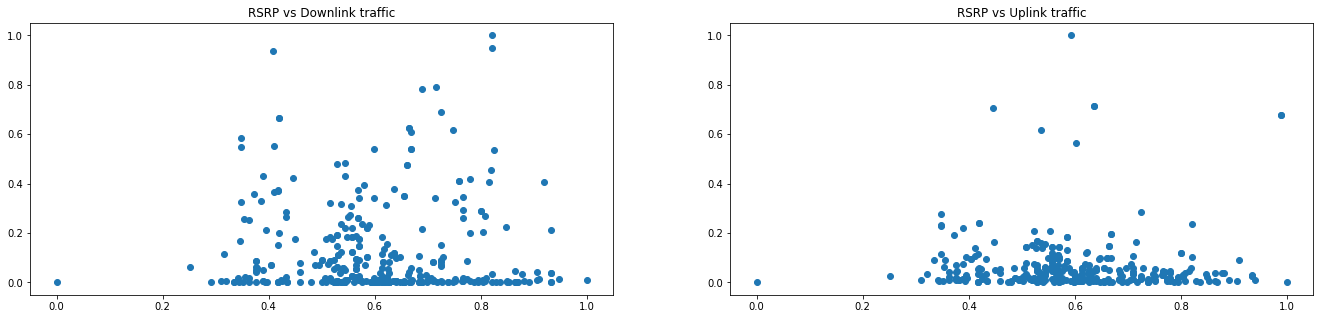

In [9]:
fig,(ax1,ax2) = plt.subplots(1, 2)

ax1.set_title("RSRP vs Downlink traffic")
ax1.scatter(Down_traffic_poly.RSRP, Down_traffic_poly.TrafficVolume)

ax2.set_title("RSRP vs Uplink traffic")
ax2.scatter(Up_traffic_poly.RSRP, Up_traffic_poly.TrafficVolume)

fig.set_figwidth(23)
fig.set_figheight(5) 
plt.show()

In [10]:
Down_traffic_poly.corr(numeric_only=True)

,LocationLatitude,LocationLongitude,TrafficVolume,RSRP
LocationLatitude,1.000000,-0.920562,0.059003,0.147401
LocationLongitude,-0.920562,1.000000,-0.043702,-0.098003
TrafficVolume,0.059003,-0.043702,1.000000,-0.008209
RSRP,0.147401,-0.098003,-0.008209,1.000000


In [11]:
Up_traffic_poly.corr(numeric_only=True)

,LocationLatitude,LocationLongitude,TrafficVolume,RSRP
LocationLatitude,1.000000,-0.928126,0.121372,0.190865
LocationLongitude,-0.928126,1.000000,-0.139009,-0.140298
TrafficVolume,0.121372,-0.139009,1.000000,0.004458
RSRP,0.190865,-0.140298,0.004458,1.000000


From the graph and the correlation matrix we can see that there's very little correlation between these variable. However, let's try a linear regression model and see how it performs then let's try other algorithms.

In [12]:
model = LinearRegression()
X = np.array(Down_traffic_poly["RSRP"]).reshape(-1,1)
y = Down_traffic_poly["TrafficVolume"]
model.fit(X, y)

LinearRegression()

In [13]:
model.score(X, y)

6.738178718657117e-05

As I expected the model performed really badly.
Let's try another model.

# Random Forest Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Down_traffic_poly.RSRP, Down_traffic_poly.TrafficVolume, test_size=0.33)

In [15]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [16]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
regr.score(X_test, y_test)

0.03426377947119208

The model is failling as well.

# Conclusion:
The data we have isn't enough to predict the traffic volume given the RSRP value, more variables should be taken into account. We can see that clearly if we added the latitude and longtitude features.

In [18]:
cols = ["Timestamp",
        "RadioOperatorName",
        "TrafficDirection",
        "RadioNetworkGeneration",
        "RadioConnectionType",
        "RadioMobileDataEnabled",
        "DeviceManufacturer", 
        "DeviceName"
       ]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(Down_traffic_poly.drop(cols ,axis=1), Down_traffic_poly.TrafficVolume, test_size=0.33)

In [20]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
regr.score(X_test, y_test)

0.9778411722892283

This mean that an increase in RSRP value could potentially mean an increase in the Downlink Traffic volume, but only in certain locations. The increase is mainly defined by the location of the user.

# Task 2: Time-Series Analysis

Here, we want to predict the traffic volume growth over time, and compare it ot other competitors.

In [187]:
print(Down_traffic["TrafficVolume"].quantile(q=0.995))
print(Up_traffic["TrafficVolume"].quantile(q=0.995))


343.4096056000081
47.05251748000037


In [171]:
Down_traffic_samsung = sqldf(
"""
SELECT Timestamp, RadioOperatorName, MAX(TrafficVolume) AS TrafficVolume
FROM Down_traffic
WHERE DeviceManufacturer = 'SAMSUNG'
GROUP BY Timestamp, RadioOperatorName
HAVING TrafficVolume <= 350
;
""", globals())

Up_traffic_samsung = sqldf(
"""
SELECT Timestamp, RadioOperatorName, MAX(TrafficVolume) AS TrafficVolume 
FROM Up_traffic
WHERE DeviceManufacturer='SAMSUNG'
GROUP BY Timestamp, RadioOperatorName
HAVING TrafficVolume <= 50
;
""", globals())

In [172]:
Down_traffic_samsung.head(10)

,Timestamp,RadioOperatorName,TrafficVolume
0,2019-11-01 20:00:00.000000,Operator C,1.244167
1,2019-11-01 20:15:00.000000,Operator C,0.145414
2,2019-11-01 21:00:00.000000,Operator A,75.150810
3,2019-11-01 21:00:00.000000,Operator B,164.994614
4,2019-11-01 21:00:00.000000,Operator C,6.198008
5,2019-11-01 21:15:00.000000,Operator A,38.276537
6,2019-11-01 21:15:00.000000,Operator B,4.385356
7,2019-11-01 21:15:00.000000,Operator C,2.403918
8,2019-11-01 21:30:00.000000,Operator A,19.906999
9,2019-11-01 21:30:00.000000,Operator B,3.702910


In [173]:
Down_traffic_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          765 non-null    object 
 1   RadioOperatorName  765 non-null    object 
 2   TrafficVolume      765 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.1+ KB


In [174]:
Up_traffic_samsung.head(10)

,Timestamp,RadioOperatorName,TrafficVolume
0,2019-11-01 19:15:00.000000,Operator C,2.731466
1,2019-11-01 20:00:00.000000,Operator C,1.175476
2,2019-11-01 20:15:00.000000,Operator C,0.105763
3,2019-11-01 21:00:00.000000,Operator A,3.188925
4,2019-11-01 21:00:00.000000,Operator B,11.678677
5,2019-11-01 21:00:00.000000,Operator C,3.364188
6,2019-11-01 21:15:00.000000,Operator A,2.290708
7,2019-11-01 21:15:00.000000,Operator B,0.993784
8,2019-11-01 21:15:00.000000,Operator C,1.865617
9,2019-11-01 21:30:00.000000,Operator A,15.030402


In [175]:
Up_traffic_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          762 non-null    object 
 1   RadioOperatorName  762 non-null    object 
 2   TrafficVolume      762 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.0+ KB


In [226]:
Down_traffic_samsung["RadioOperatorName"] = Down_traffic_samsung["RadioOperatorName"].astype('category')
Up_traffic_samsung["RadioOperatorName"] = Up_traffic_samsung["RadioOperatorName"].astype('category')

Down_traffic_samsung["Timestamp"] = pd.to_datetime(Down_traffic_samsung["Timestamp"])
Up_traffic_samsung["Timestamp"] = pd.to_datetime(Up_traffic_samsung["Timestamp"])

In [227]:
Down_traffic_samsung.info()
Up_traffic_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          765 non-null    datetime64[ns]
 1   RadioOperatorName  765 non-null    category      
 2   TrafficVolume      765 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 13.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          762 non-null    datetime64[ns]
 1   RadioOperatorName  762 non-null    category      
 2   TrafficVolume      762 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [228]:
def split_by_operator(df):
    df_a = df[df["RadioOperatorName"] == "Operator A"].copy()
    df_b = df[df["RadioOperatorName"] == "Operator B"].copy()
    df_c = df[df["RadioOperatorName"] == "Operator C"].copy()
    return df_a, df_b, df_c

In [229]:
Down_traffic_samsung_A, Down_traffic_samsung_B, Down_traffic_samsung_C = split_by_operator(Down_traffic_samsung)

Up_traffic_samsung_A, Up_traffic_samsung_B, Up_traffic_samsung_C = split_by_operator(Up_traffic_samsung)

In [230]:
def to_ts(df):
    df.set_index("Timestamp", inplace=True)
    return df.drop("RadioOperatorName", axis=1).resample(rule='15T').sum(min_count=1)

In [231]:
Down_traffic_samsung_A = to_ts(Down_traffic_samsung_A)
Down_traffic_samsung_B = to_ts(Down_traffic_samsung_B)
Down_traffic_samsung_C = to_ts(Down_traffic_samsung_C)

Up_traffic_samsung_A = to_ts(Up_traffic_samsung_A)
Up_traffic_samsung_B = to_ts(Up_traffic_samsung_B)
Up_traffic_samsung_C = to_ts(Up_traffic_samsung_C)

In [232]:
Up_traffic_samsung_B.head(20)

,TrafficVolume
Timestamp,
2019-11-01 21:00:00,11.678677
2019-11-01 21:15:00,0.993784
2019-11-01 21:30:00,2.195692
2019-11-01 21:45:00,14.080850
2019-11-01 22:00:00,5.115523
2019-11-01 22:15:00,0.478801
2019-11-01 22:30:00,1.626882
2019-11-01 22:45:00,1.353063
2019-11-01 23:00:00,1.816556


In [233]:
Down_traffic_samsung_A["TrafficVolume"] = Down_traffic_samsung_A["TrafficVolume"].interpolate()
Down_traffic_samsung_B["TrafficVolume"] = Down_traffic_samsung_B["TrafficVolume"].interpolate()
Down_traffic_samsung_C["TrafficVolume"] = Down_traffic_samsung_C["TrafficVolume"].interpolate()

Up_traffic_samsung_A["TrafficVolume"] = Up_traffic_samsung_A["TrafficVolume"].interpolate()
Up_traffic_samsung_B["TrafficVolume"] = Up_traffic_samsung_B["TrafficVolume"].interpolate()
Up_traffic_samsung_C["TrafficVolume"] = Up_traffic_samsung_C["TrafficVolume"].interpolate()

In [234]:
Up_traffic_samsung_B.head(20)

,TrafficVolume
Timestamp,
2019-11-01 21:00:00,11.678677
2019-11-01 21:15:00,0.993784
2019-11-01 21:30:00,2.195692
2019-11-01 21:45:00,14.080850
2019-11-01 22:00:00,5.115523
2019-11-01 22:15:00,0.478801
2019-11-01 22:30:00,1.626882
2019-11-01 22:45:00,1.353063
2019-11-01 23:00:00,1.816556


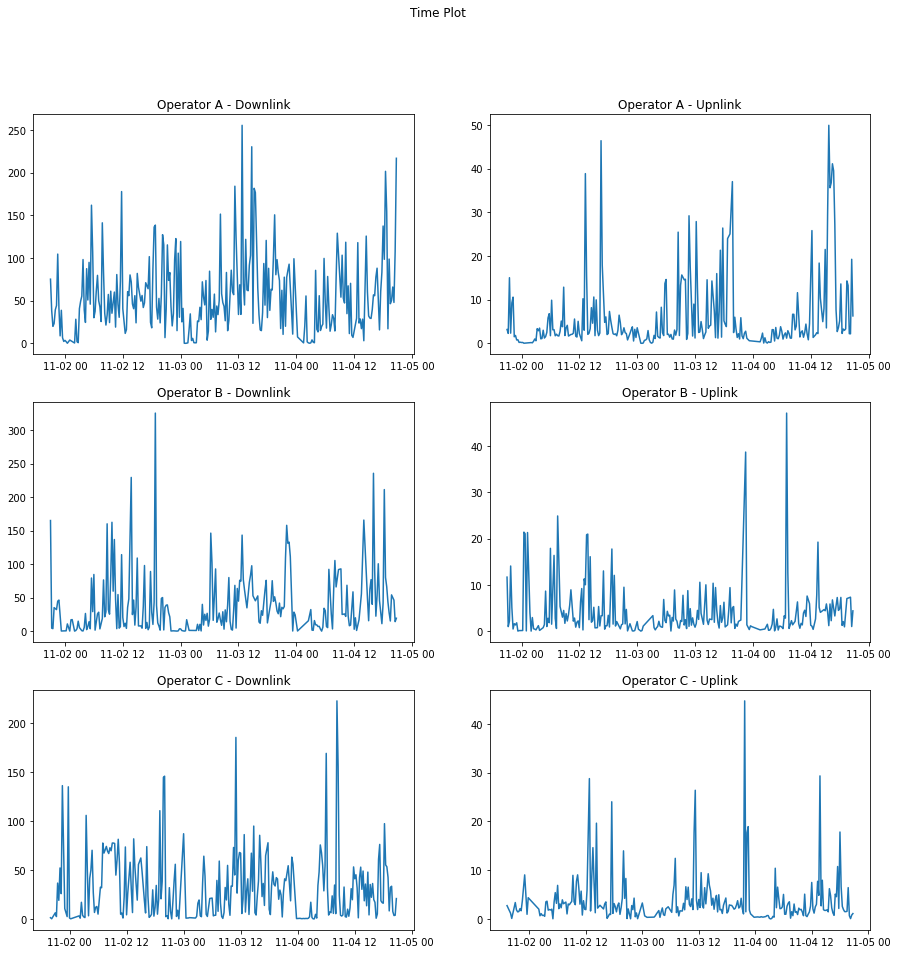

In [235]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Time Plot')

axs[0][0].set_title('Operator A - Downlink')
axs[0][1].set_title('Operator A - Upnlink')
axs[1][0].set_title('Operator B - Downlink')
axs[1][1].set_title('Operator B - Uplink')
axs[2][0].set_title('Operator C - Downlink')
axs[2][1].set_title('Operator C - Uplink')

axs[0][0].plot(Down_traffic_samsung_A)
axs[0][1].plot(Up_traffic_samsung_A)
axs[1][0].plot(Down_traffic_samsung_B)
axs[1][1].plot(Up_traffic_samsung_B)
axs[2][0].plot(Down_traffic_samsung_C)
axs[2][1].plot(Up_traffic_samsung_C)
plt.show()

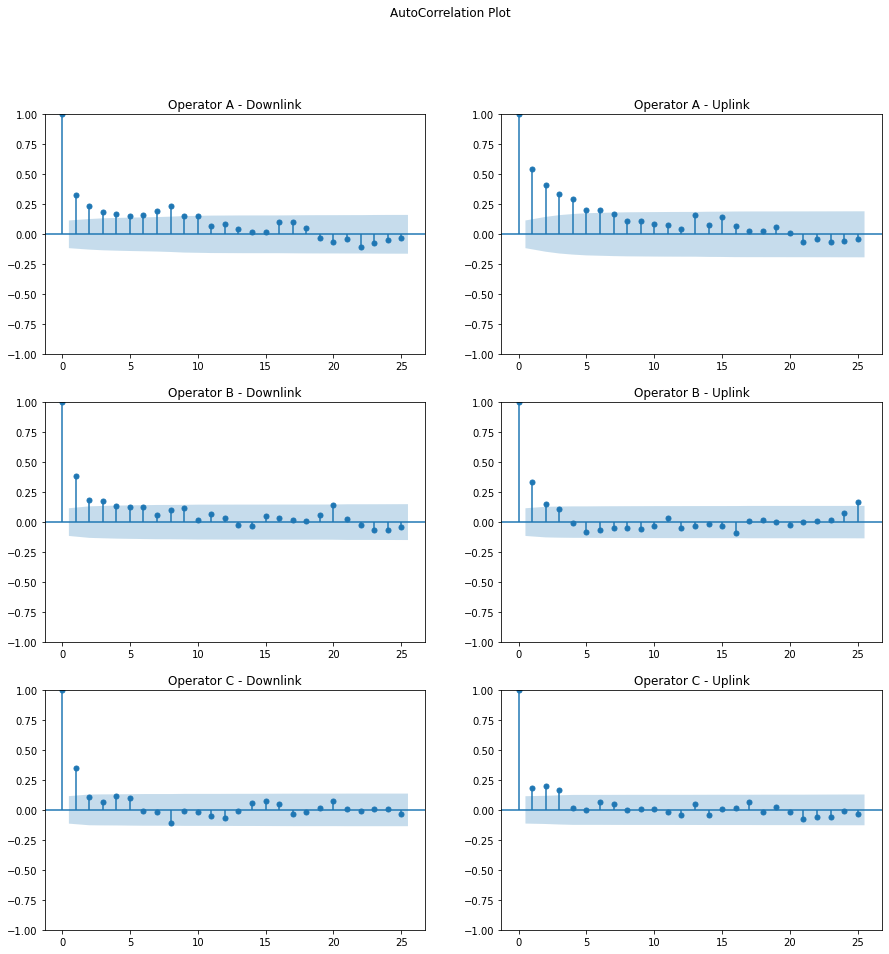

In [236]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('AutoCorrelation Plot')

plot_acf(Down_traffic_samsung_A, ax=axs[0][0], title="Operator A - Downlink")
plot_acf(Up_traffic_samsung_A, ax=axs[0][1], title="Operator A - Uplink")
plot_acf(Down_traffic_samsung_B, ax=axs[1][0], title="Operator B - Downlink")
plot_acf(Up_traffic_samsung_B, ax=axs[1][1], title="Operator B - Uplink")
plot_acf(Down_traffic_samsung_C, ax=axs[2][0], title="Operator C - Downlink")
plot_acf(Up_traffic_samsung_C, ax=axs[2][1], title="Operator C - Uplink")
plt.show()

In [217]:
# The augmented Dickey-Fuller test can be used to test if this is a random walk
results_dl_a = adfuller(Up_traffic_samsung_B["TrafficVolume"])[1]
results_dl_a

3.6958209294080374e-22